In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
df_train=pd.read_csv('train.csv')   
df_test=pd.read_csv('test.csv') 
df3=pd.read_csv('gender_submission.csv')

In [3]:
df_train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [4]:
df_test = pd.concat([df_test,df3], axis=1)

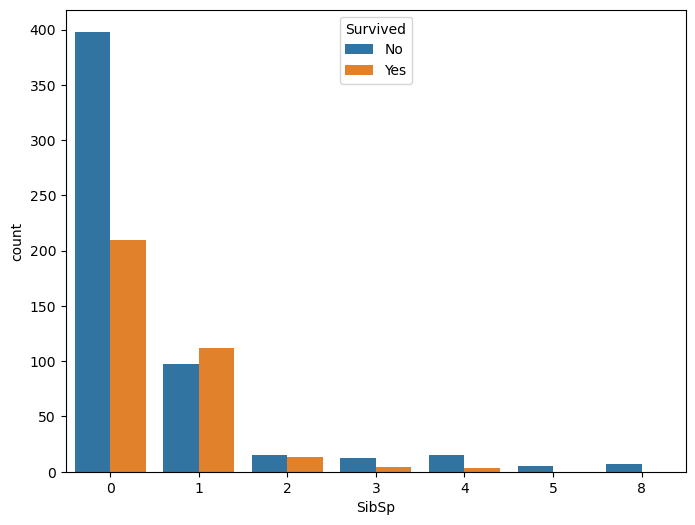

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SibSp', hue='Survived', data=df_train)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

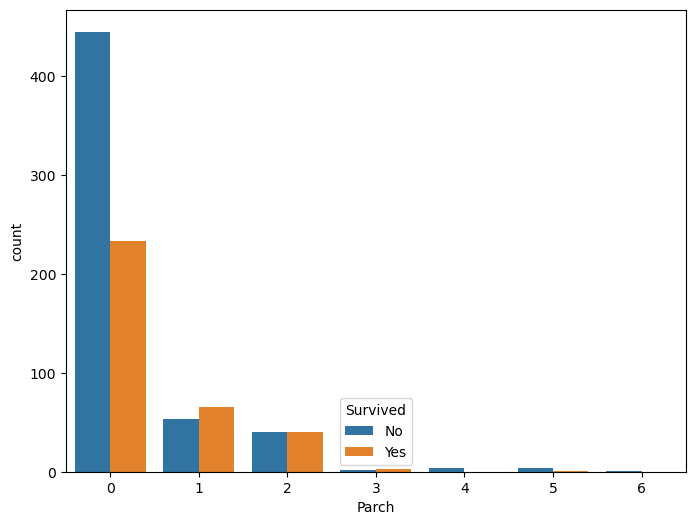

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Parch', hue='Survived', data=df_train)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [7]:
df_test['Family']=df_test['SibSp']+df_test['Parch']
df_train['Family']=df_train['SibSp']+df_train['Parch']

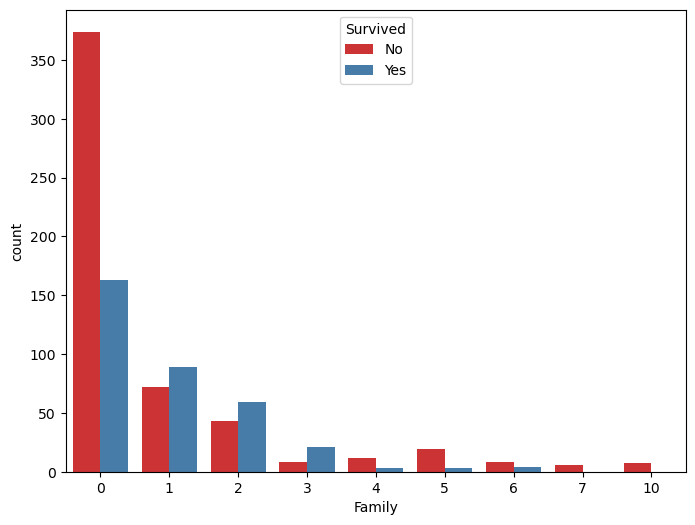

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Family', hue='Survived', data=df_train, palette='Set1')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [9]:
label_encoder = LabelEncoder()
df_train['Sex'] = label_encoder.fit_transform(df_train['Sex'])
df_test['Sex'] = label_encoder.transform(df_test['Sex'])

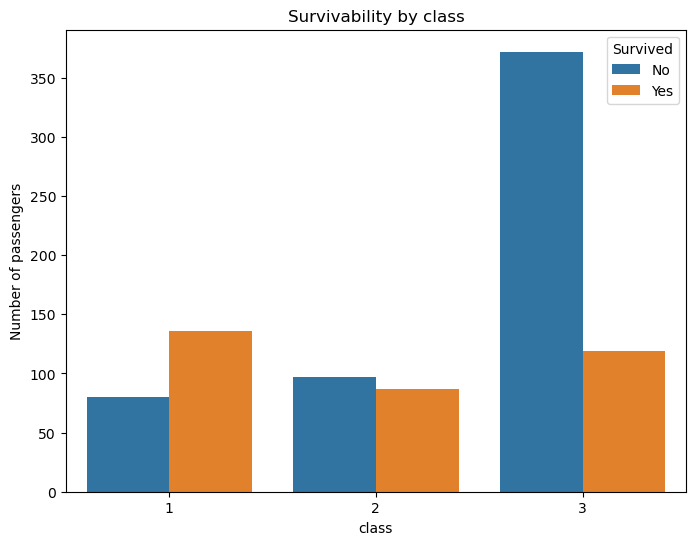

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df_train)
plt.title('Survivability by class')
plt.xlabel('class')
plt.ylabel('Number of passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

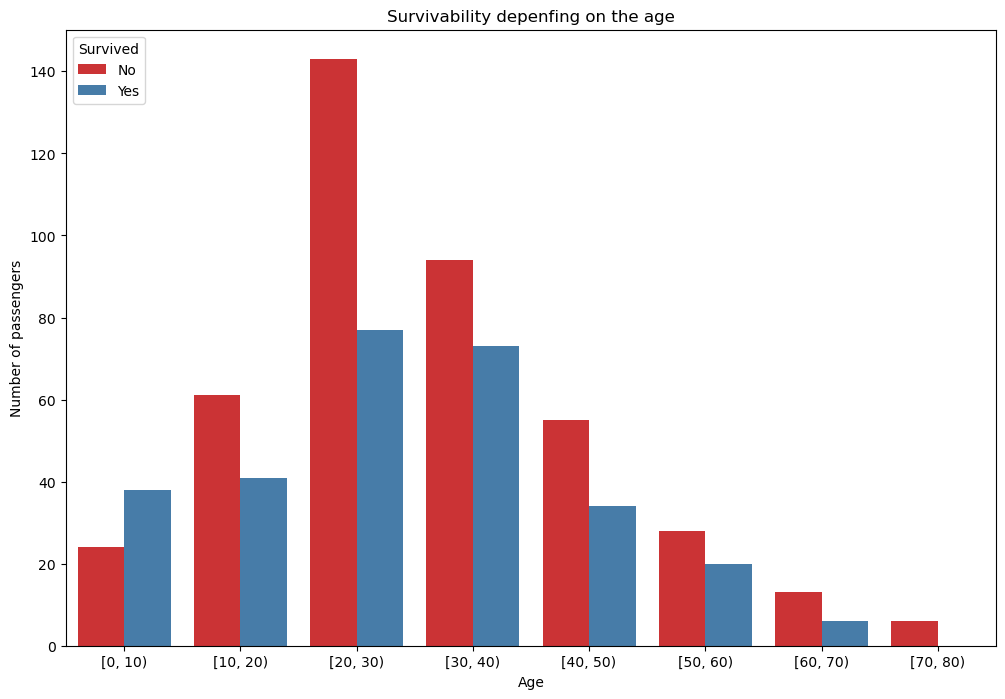

In [11]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
df_train['Age_Category'] = pd.cut(df_train['Age'], bins=age_bins, right=False)
plt.figure(figsize=(12, 8))
sns.countplot(x='Age_Category', hue='Survived', data=df_train, palette='Set1')
plt.title('Survivability depenfing on the age')
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [12]:
important_infos = ['Pclass', 'Sex', 'Age', 'Family']

df_train_copie=df_train.copy()
df_test_copie=df_test.copy()

df_train_copie=df_train_copie.dropna(subset=important_infos)
df_test_copie=df_test_copie.dropna(subset=important_infos)
    

In [13]:
df_train[important_infos].head(6)

,Pclass,Sex,Age,Family
0,3,1,22.0,1
1,1,0,38.0,1
2,3,0,26.0,0
3,1,0,35.0,1
4,3,1,35.0,0
5,3,1,NaN,0


In [14]:
df_train_copie[important_infos].head(6)

,Pclass,Sex,Age,Family
0,3,1,22.0,1
1,1,0,38.0,1
2,3,0,26.0,0
3,1,0,35.0,1
4,3,1,35.0,0
6,1,1,54.0,0


In [15]:
X_train = df_train_copie[important_infos]
y_train = df_train_copie['Survived']

X_test = df_test_copie[important_infos]
y_test = df_test_copie['Survived']

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

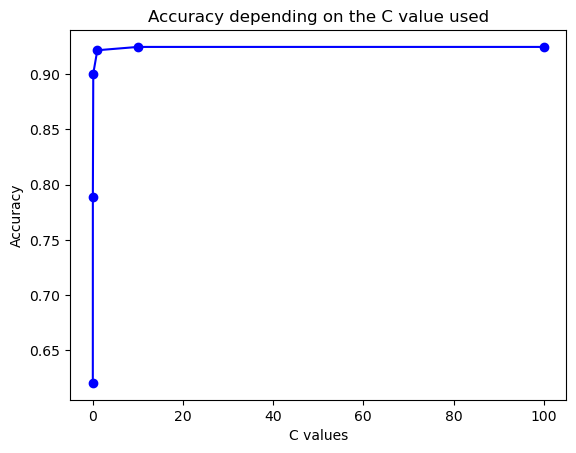

In [17]:
C= [0.001, 0.01, 0.1, 1, 10, 100]
accuracy_values=[]
for c_value in C:
    lr_classifier = LogisticRegression(C=c_value)
    lr_classifier.fit(X_train, y_train)
    lr_predictions = lr_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, lr_predictions)
    accuracy_values.append(accuracy)

plt.plot(C,accuracy_values, marker='o', color='b')
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.title('Accuracy depending on the C value used')
plt.show()

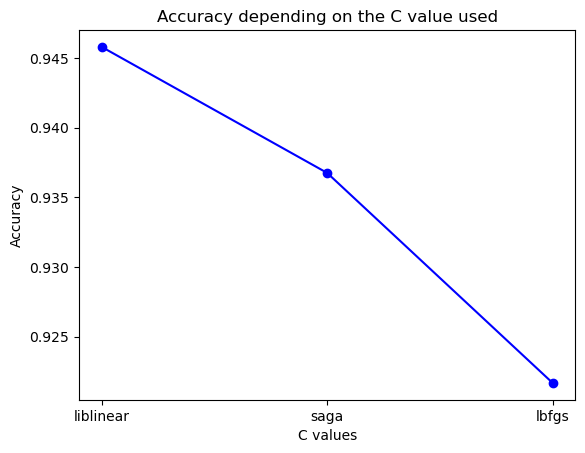

In [18]:
solver= ['liblinear', 'saga', 'lbfgs']
accuracy_values=[]
for solv in solver:
    lr_classifier = LogisticRegression(solver=solv, max_iter=10000)
    lr_classifier.fit(X_train, y_train)
    lr_predictions = lr_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, lr_predictions)
    accuracy_values.append(accuracy)

plt.plot(solver,accuracy_values, marker='o', color='b')
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.title('Accuracy depending on the C value used')
plt.show()

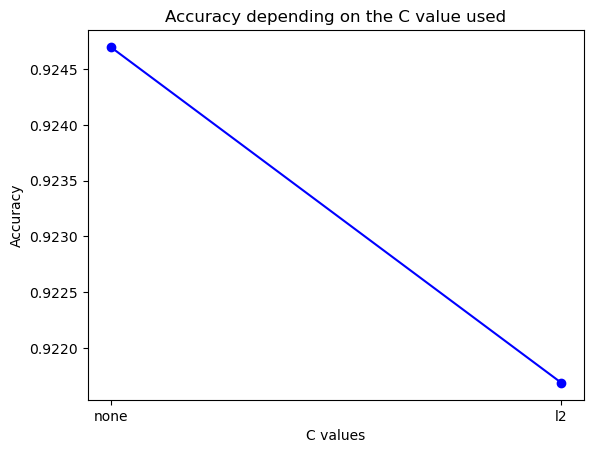

In [19]:
penalty = ['none','l2']
accuracy_values=[]
for pen in penalty:
    lr_classifier = LogisticRegression(penalty=pen)
    lr_classifier.fit(X_train, y_train)
    lr_predictions = lr_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, lr_predictions)
    accuracy_values.append(accuracy)

plt.plot(penalty,accuracy_values, marker='o', color='b')
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.title('Accuracy depending on the C value used')
plt.show()

In [20]:
penalty= ['l2']#l1, elasticnet and none
C=[0.001, 0.01, 0.1, 1, 10, 100]
solver= ['liblinear', 'saga', 'lbfgs']
for pen in penalty:
    for c_value in C:
        for solv in solver:
            lr_classifier = LogisticRegression(penalty=pen, C=c_value, solver=solv, max_iter=10000)
            lr_classifier.fit(X_train, y_train)
            lr_predictions = lr_classifier.predict(X_test)
            accuracy = accuracy_score(y_test, lr_predictions)
            print("With penalty = {}, solver = {} and C = {}, we have an accuracy of {}".format(pen,solv,c_value,accuracy))

With penalty = l2, solver = liblinear and C = 0.001, we have an accuracy of 0.6174698795180723
With penalty = l2, solver = saga and C = 0.001, we have an accuracy of 0.6234939759036144
With penalty = l2, solver = lbfgs and C = 0.001, we have an accuracy of 0.6204819277108434
With penalty = l2, solver = liblinear and C = 0.01, we have an accuracy of 0.786144578313253
With penalty = l2, solver = saga and C = 0.01, we have an accuracy of 0.7921686746987951
With penalty = l2, solver = lbfgs and C = 0.01, we have an accuracy of 0.7891566265060241
With penalty = l2, solver = liblinear and C = 0.1, we have an accuracy of 1.0
With penalty = l2, solver = saga and C = 0.1, we have an accuracy of 0.9096385542168675
With penalty = l2, solver = lbfgs and C = 0.1, we have an accuracy of 0.9006024096385542
With penalty = l2, solver = liblinear and C = 1, we have an accuracy of 0.9457831325301205
With penalty = l2, solver = saga and C = 1, we have an accuracy of 0.9367469879518072
With penalty = l2, s

In [21]:
param_grid_lr = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga', 'lbfgs']
}

In [22]:
lr_classifier = LogisticRegression()
grid_search_lr = GridSearchCV(lr_classifier, param_grid=param_grid_lr)
grid_search_lr.fit(X_train_scaled, y_train)
lr_classifier = grid_search_lr.best_estimator_
print("Best Hyperparameters for this Logistic Regression:", grid_search_lr.best_params_)
lr_predictions = lr_classifier.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)

Best Hyperparameters for this Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.9246987951807228


In [23]:
handeling_missing_values=['mean','median','most_frequent']

for i in range (len(handeling_missing_values)):
    
    df_train_copie2=df_train.copy()
    df_test_copie2=df_test.copy()
    imputer = SimpleImputer(strategy=handeling_missing_values[i])
    df_train_copie2[important_infos] = pd.DataFrame(imputer.fit_transform(df_train_copie2[important_infos]),columns=important_infos)
    df_test_copie2[important_infos] = pd.DataFrame(imputer.fit_transform(df_test_copie2[important_infos]),columns=important_infos)
    
    X_train = df_train_copie2[important_infos]
    y_train = df_train_copie2['Survived']

    X_test = df_test_copie2[important_infos]
    y_test = df_test_copie2['Survived']


    param_grid_lr = {
        'penalty': ['l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga', 'lbfgs']
    }

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    lr_classifier = LogisticRegression()
    grid_search_lr = GridSearchCV(lr_classifier, param_grid=param_grid_lr, cv=5)
    grid_search_lr.fit(X_train_scaled, y_train)
    lr_classifier = grid_search_lr.best_estimator_
    print("\nBest Hyperparameters for this Logistic Regression:", grid_search_lr.best_params_)
    lr_predictions = lr_classifier.predict(X_test_scaled)
    lr_accuracy = accuracy_score(y_test, lr_predictions)
    print("Confusion Matrix when remplacing any missing information by the {} value of the column: ".format(handeling_missing_values[i]))
    print(confusion_matrix(y_test,lr_predictions))
    print("Accuracy when remplacing any missing information by the {} value of the column: {}".format(handeling_missing_values[i],lr_accuracy))


Best Hyperparameters for this Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Confusion Matrix when remplacing any missing information by the mean value of the column: 
[[258   8]
 [ 12 140]]
Accuracy when remplacing any missing information by the mean value of the column: 0.9521531100478469

Best Hyperparameters for this Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Confusion Matrix when remplacing any missing information by the median value of the column: 
[[264   2]
 [  3 149]]
Accuracy when remplacing any missing information by the median value of the column: 0.9880382775119617

Best Hyperparameters for this Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Confusion Matrix when remplacing any missing information by the most_frequent value of the column: 
[[266   0]
 [ 10 142]]
Accuracy when remplacing any missing information by the most_frequent value of the column: 0.9760765550239234


C:\Users\loicb\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\Users\loicb\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode 